# Heart Disease Prediction Using Machine Learning

1. Data Cleaning: Ensure proper data types by converting values into the required formats and adding necessary columns.

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv("HeartDiseaseTrain-Test.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [35]:
df = pd.read_csv("HeartDiseaseTrain-Test.csv")


df.rename(columns={
    "cholestoral": "cholesterol",
    "Max_heart_rate": "max_heart_rate",
    "vessels_colored_by_flourosopy": "vessels_colored_by_fluoroscopy"
}, inplace=True)

# Converting categorical text values to numerical values
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df["fasting_blood_sugar"] = df["fasting_blood_sugar"].map({
    "Lower than 120 mg/ml": 0,
    "Greater than 120 mg/ml": 1
})
df["exercise_induced_angina"] = df["exercise_induced_angina"].map({"No": 0, "Yes": 1})

# Encoding categorical variables using label encoding or mapping
category_mappings = {
    "chest_pain_type": {"Typical angina": 1, "Atypical angina": 2, "Non-anginal pain": 3, "Asymptomatic": 4},
    "rest_ecg": {"Normal": 0, "ST-T wave abnormality": 1, "Left ventricular hypertrophy": 2},
    "slope": {"Upsloping": 1, "Flat": 2, "Downsloping": 3},
    "vessels_colored_by_fluoroscopy": {"Zero": 0, "One": 1, "Two": 2, "Three": 3},
    "thalassemia": {"Normal": 1, "Fixed Defect": 2, "Reversable Defect": 3}
}

for column, mapping in category_mappings.items():
    df[column] = df[column].map(mapping)

df.drop_duplicates(inplace=True)

# Save cleaned dataset
cleaned_file_path = "HeartDisease_Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Data cleaning completed. Cleaned file saved as: {cleaned_file_path}")
print(df.head())

Data cleaning completed. Cleaned file saved as: HeartDisease_Cleaned.csv
   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    1                1                     125          212   
1   53    1                1                     140          203   
2   70    1                1                     145          174   
3   61    1                1                     148          203   
4   62    0                1                     138          294   

   fasting_blood_sugar  rest_ecg  max_heart_rate  exercise_induced_angina  \
0                    0         1             168                        0   
1                    1         0             155                        1   
2                    0         1             125                        1   
3                    0         1             161                        0   
4                    1         1             106                        0   

   oldpeak  slope  vessels_colored_by_fluoroscopy

2. Data Visualization: Conduct univariate, bivariate, and multivariate analyses.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("HeartDisease_Cleaned.csv")

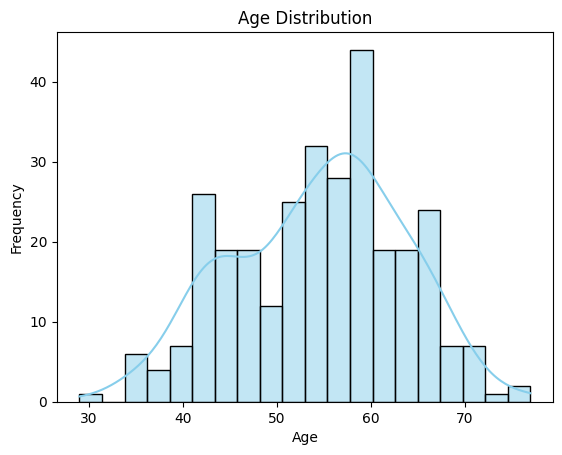

C:\Users\manta\AppData\Local\Temp\ipykernel_10668\4277171924.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


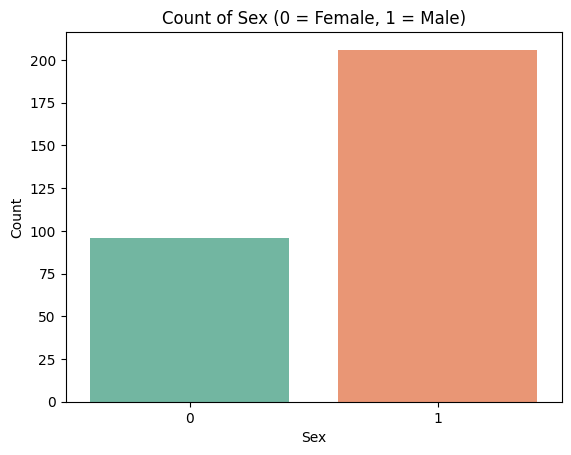

C:\Users\manta\AppData\Local\Temp\ipykernel_10668\4277171924.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


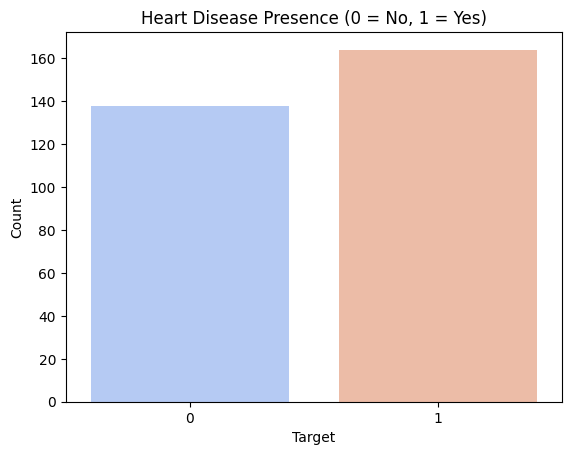

In [37]:
# 1. UNIVARIATE ANALYSIS

# Histogram of Age
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Countplot for Sex
sns.countplot(x='sex', data=df, palette='Set2')
plt.title("Count of Sex (0 = Female, 1 = Male)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Countplot for Target (Heart Disease presence)
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Heart Disease Presence (0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

C:\Users\manta\AppData\Local\Temp\ipykernel_10668\4067485984.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='Set3')


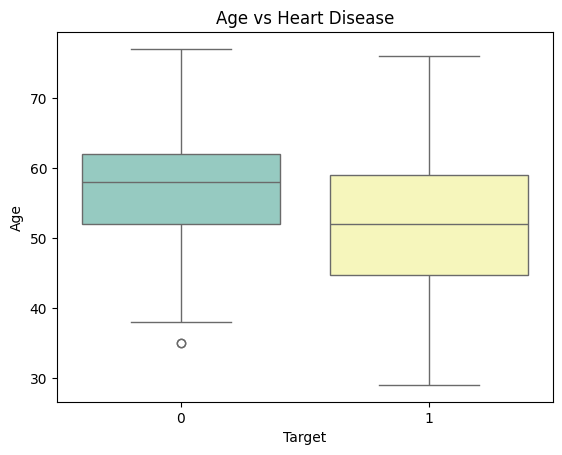

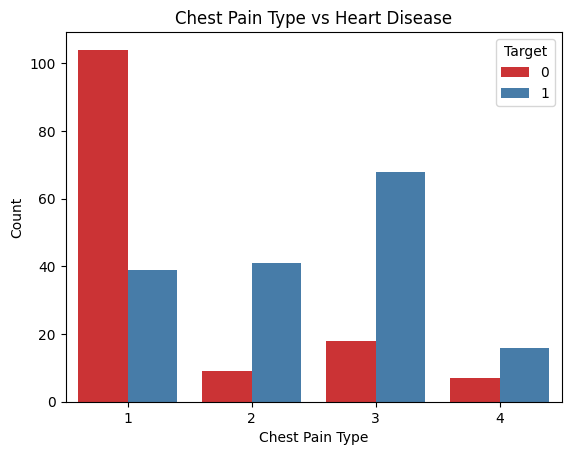

In [38]:
#2. BIVARIATE ANALYSIS

# Age vs. Target
sns.boxplot(x='target', y='age', data=df, palette='Set3')
plt.title("Age vs Heart Disease")
plt.xlabel("Target")
plt.ylabel("Age")
plt.show()

# Chest Pain Type vs. Target
sns.countplot(x='chest_pain_type', hue='target', data=df, palette='Set1')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title='Target')
plt.show()

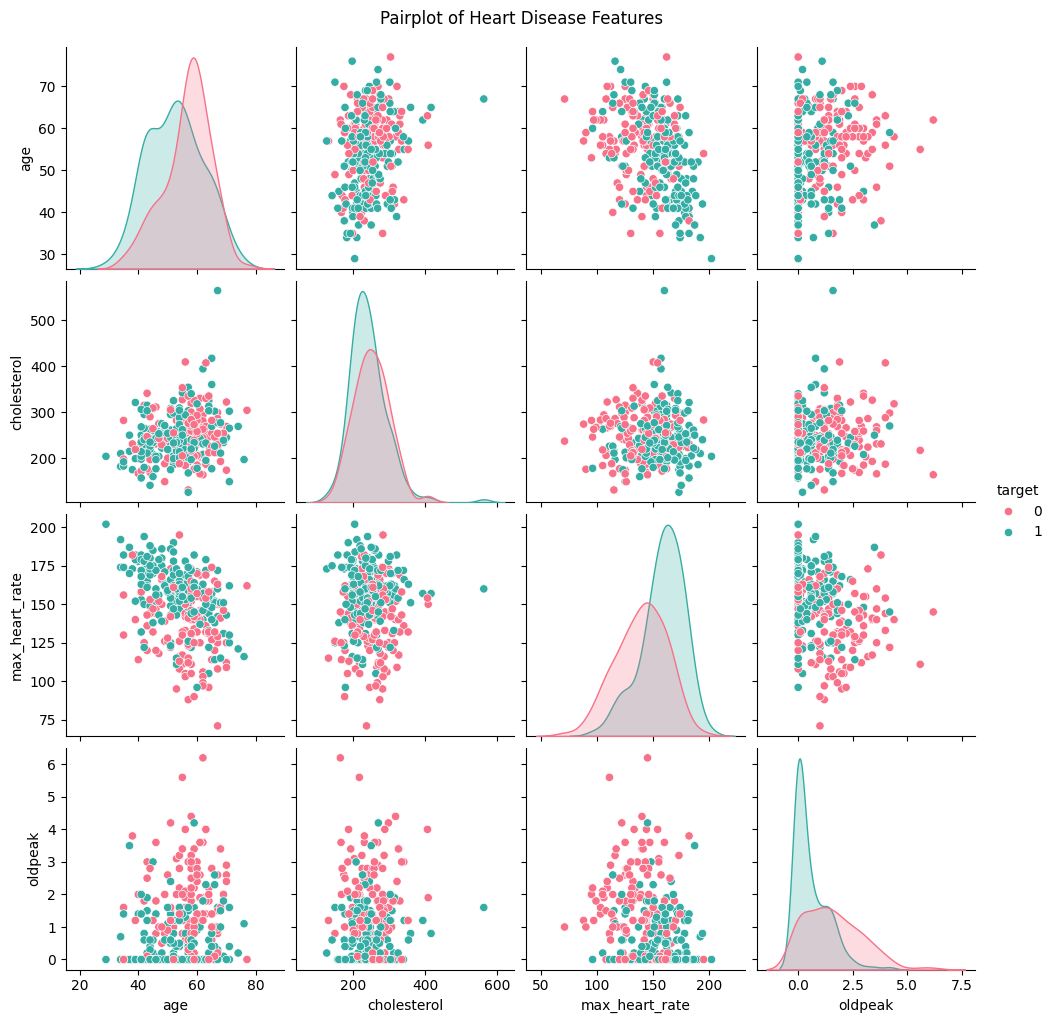

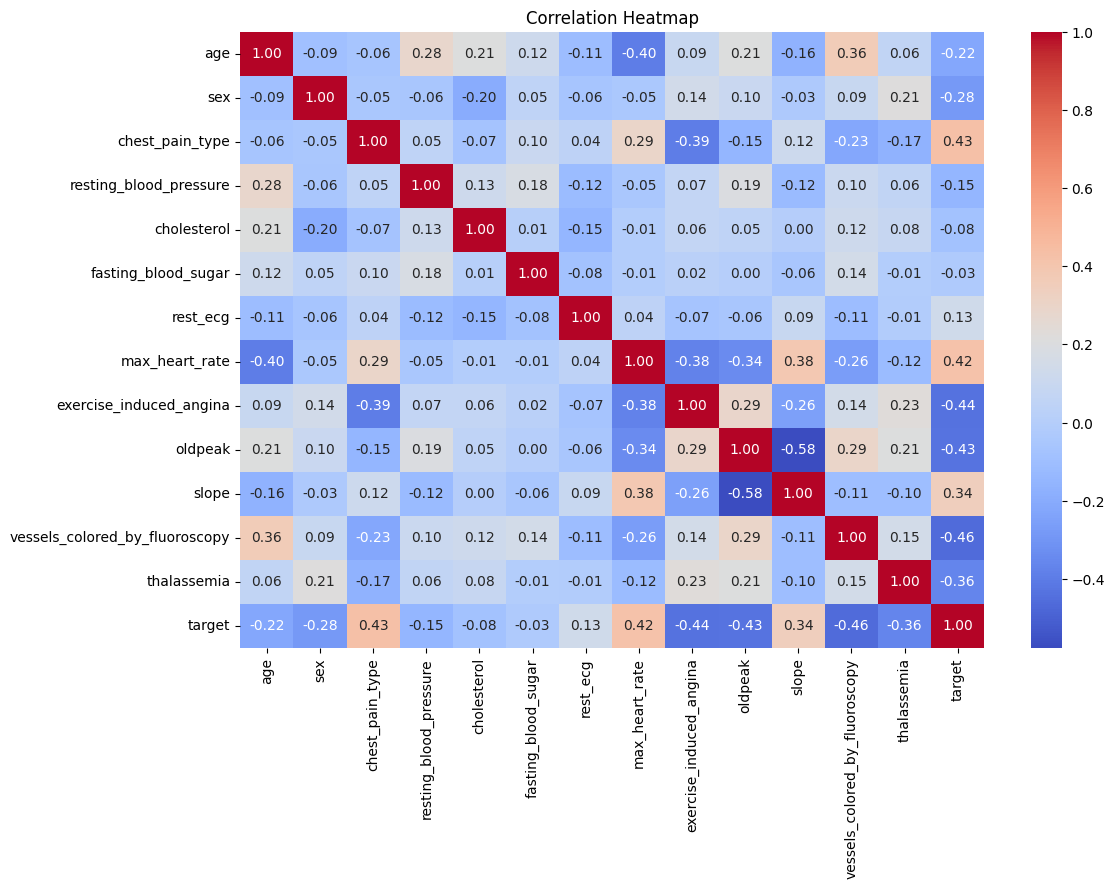

In [39]:
# 3. MULTIVARIATE ANALYSIS

# Pairplot of selected numerical features colored by target
selected_features = ['age', 'cholesterol', 'max_heart_rate', 'oldpeak', 'target']
sns.pairplot(df[selected_features], hue='target', palette='husl')
plt.suptitle("Pairplot of Heart Disease Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

3. Handling Missing Data: Provide proper justification for each column by visualizing the effects before and after handling missing data.

In [40]:
df = pd.read_csv("HeartDisease_Cleaned.csv")
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 age                               0
sex                               0
chest_pain_type                   0
resting_blood_pressure            0
cholesterol                       0
fasting_blood_sugar               0
rest_ecg                          0
max_heart_rate                    0
exercise_induced_angina           0
oldpeak                           0
slope                             0
vessels_colored_by_fluoroscopy    4
thalassemia                       2
target                            0
dtype: int64


In [41]:
# For numerical column: vessels_colored_by_fluoroscopy
df['vessels_colored_by_fluoroscopy'] = df['vessels_colored_by_fluoroscopy'].mode()[0]
# For categorical column: thalassemia
df['thalassemia'] = df['thalassemia'].mode()[0]

# Check if missing values are handled
print(df.isnull().sum())

age                               0
sex                               0
chest_pain_type                   0
resting_blood_pressure            0
cholesterol                       0
fasting_blood_sugar               0
rest_ecg                          0
max_heart_rate                    0
exercise_induced_angina           0
oldpeak                           0
slope                             0
vessels_colored_by_fluoroscopy    0
thalassemia                       0
target                            0
dtype: int64


4. Standardization and Normalization of Data: Justify the need for these processes with visualizations showing effects before and after.


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_cols = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak']

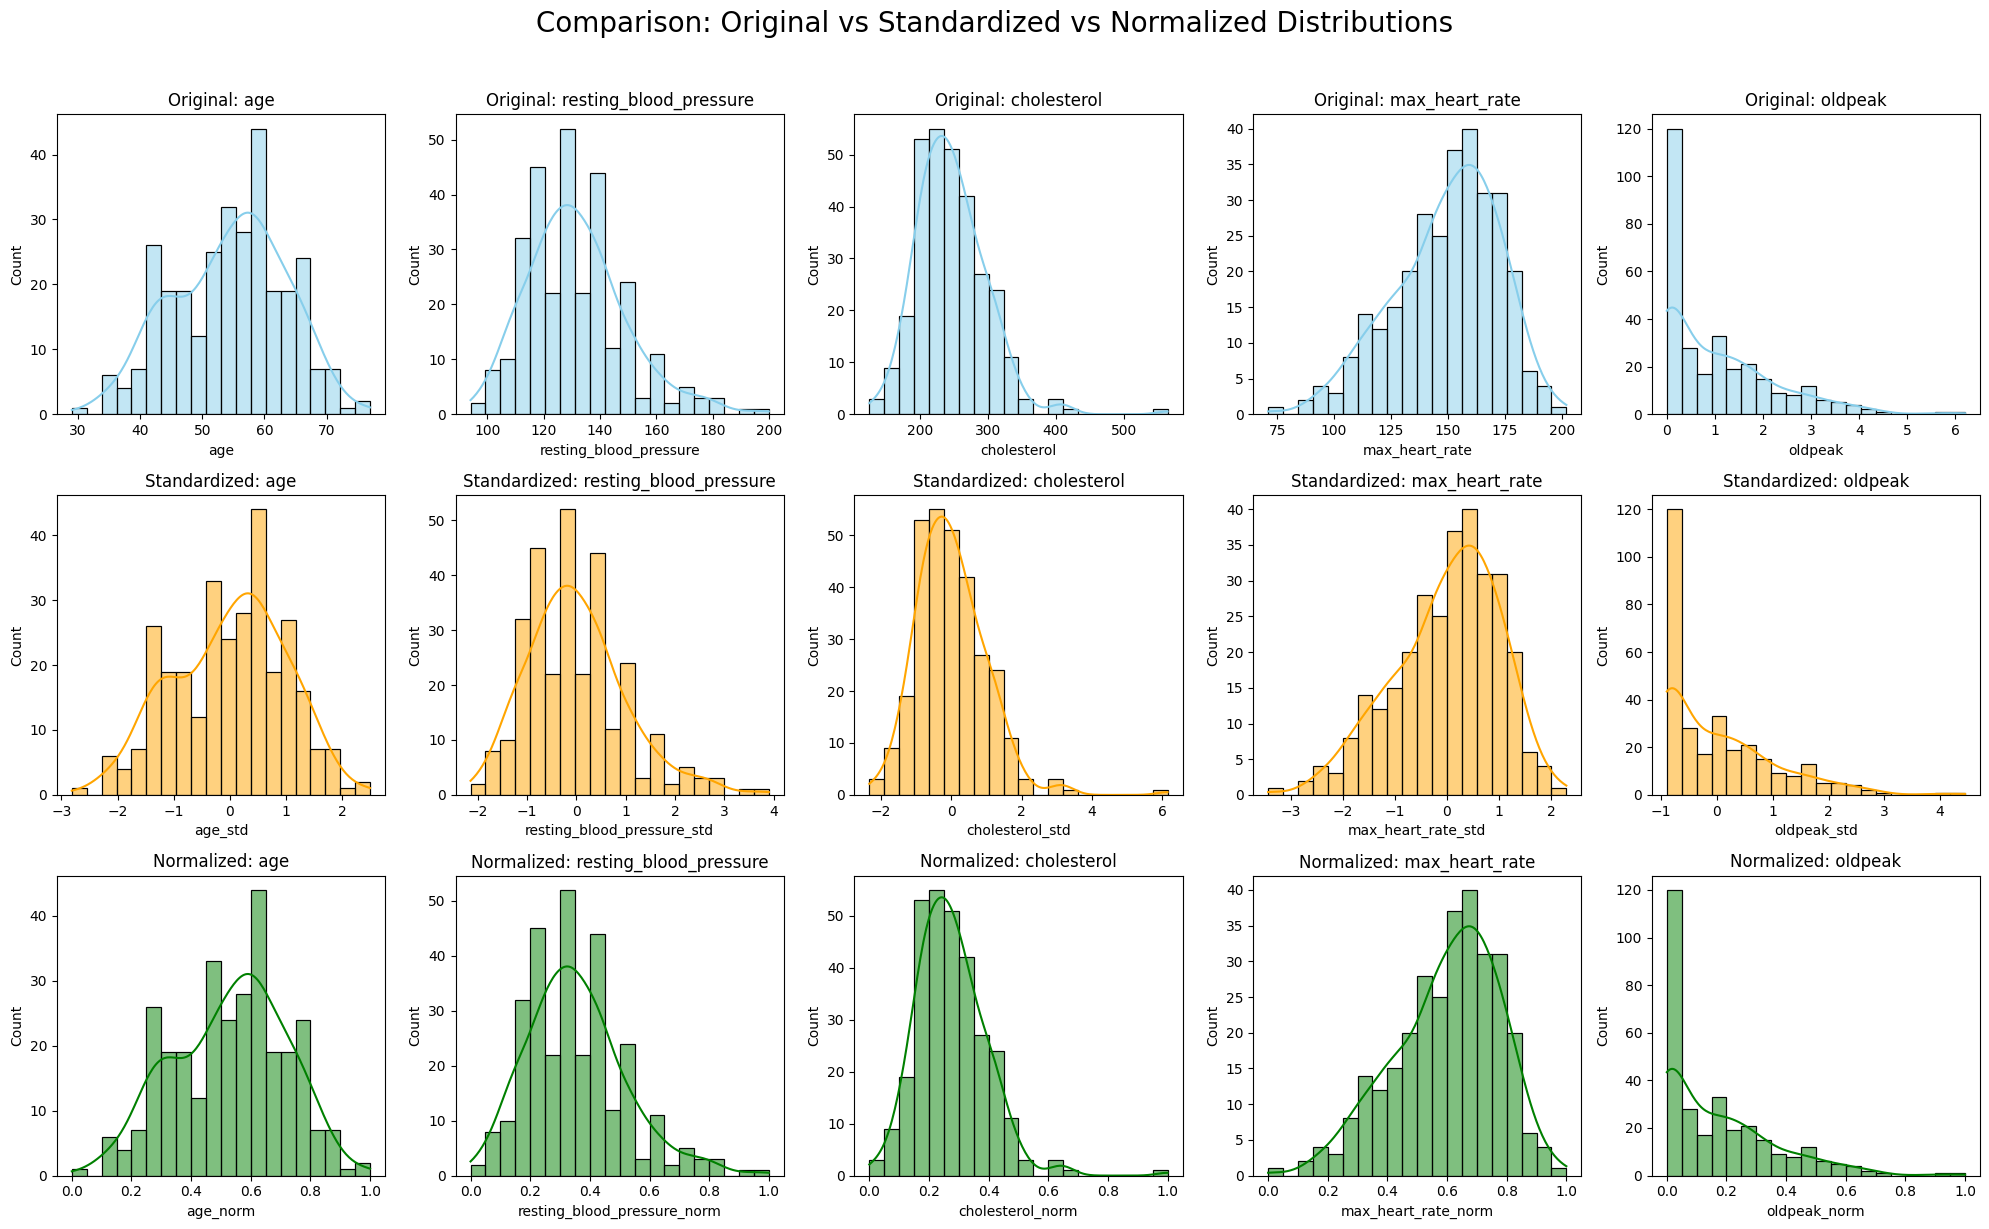

In [43]:
# 1. Standardize your original df
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(
    scaler_standard.fit_transform(df[numerical_cols]),
    columns=[col + "_std" for col in numerical_cols]
)

# 2. Normalize your original df
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler_minmax.fit_transform(df[numerical_cols]),
    columns=[col + "_norm" for col in numerical_cols]
)

# ---- PLOTTING ----

fig, axes = plt.subplots(3, len(numerical_cols), figsize=(20, 12))
fig.suptitle("Comparison: Original vs Standardized vs Normalized Distributions", fontsize=20, y=1.02)

# 1st row: Original Data
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, color='skyblue', edgecolor='black', ax=axes[0, i], kde=True)
    axes[0, i].set_title(f"Original: {col}")

# 2nd row: Standardized Data
for i, col in enumerate(numerical_cols):
    sns.histplot(df_standardized[col + "_std"], bins=20, color='orange', edgecolor='black', ax=axes[1, i], kde=True)
    axes[1, i].set_title(f"Standardized: {col}")

# 3rd row: Normalized Data
for i, col in enumerate(numerical_cols):
    sns.histplot(df_normalized[col + "_norm"], bins=20, color='green', edgecolor='black', ax=axes[2, i], kde=True)
    axes[2, i].set_title(f"Normalized: {col}")

plt.tight_layout()
plt.show()

5. Handling Outliers


In [44]:
# Select numerical columns to check for outliers
numerical_cols = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak']

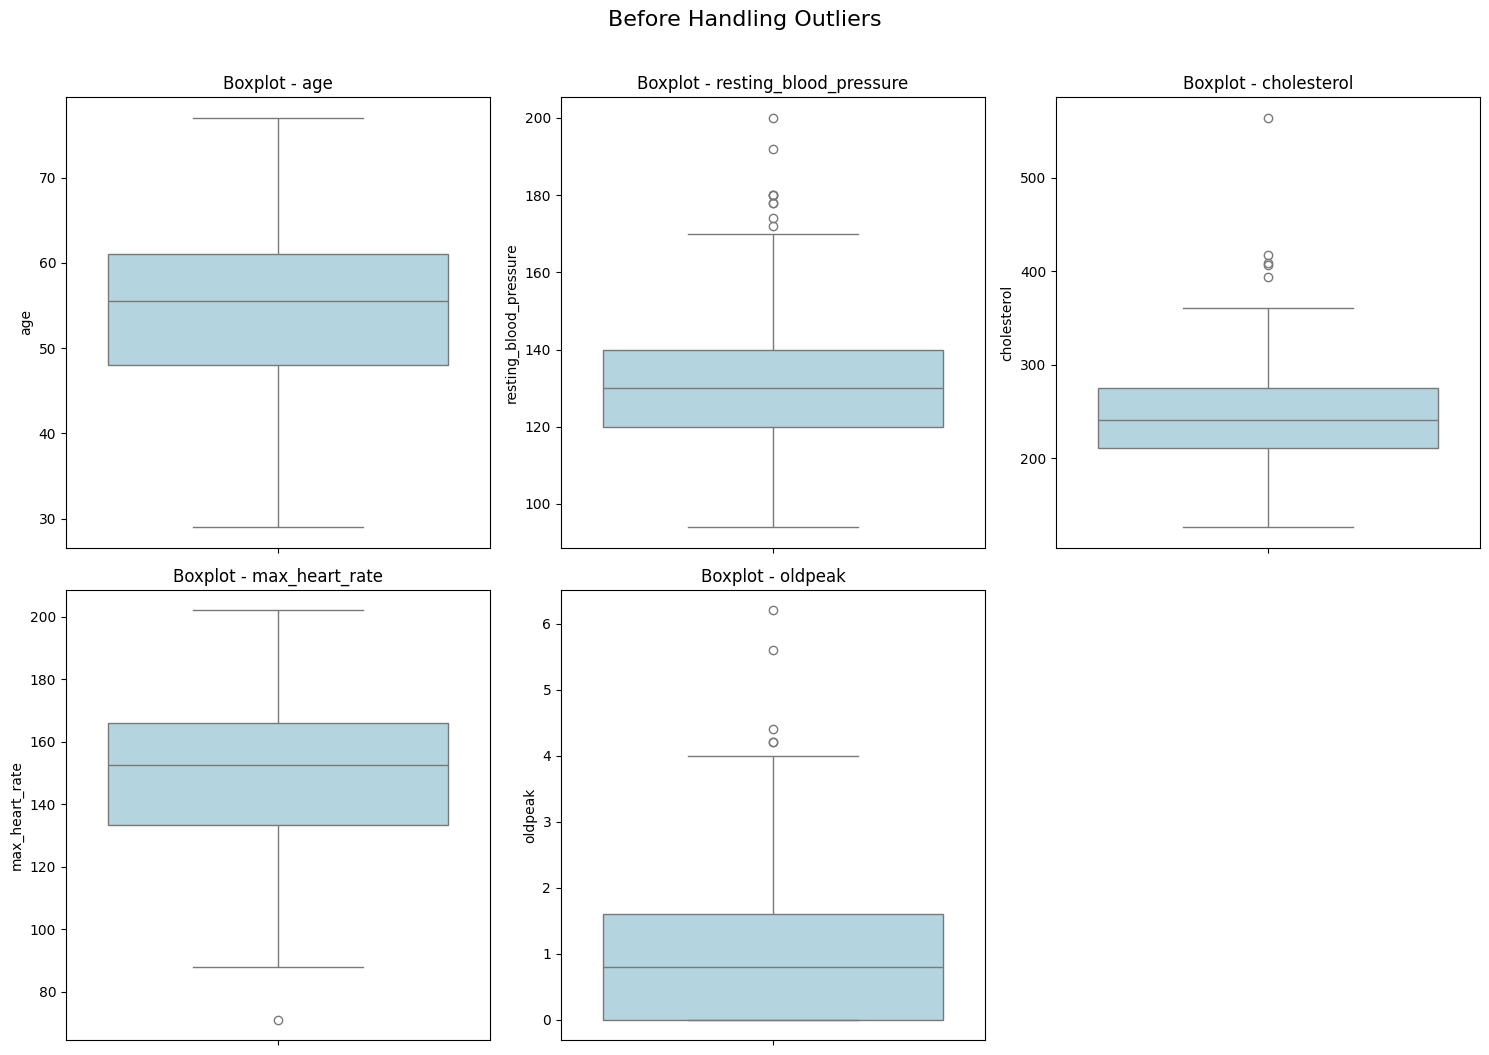

In [45]:
# 1. BOXPLOTS TO VISUALIZE OUTLIERS
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.suptitle("Before Handling Outliers", fontsize=16, y=1.05)
plt.show()

In [46]:
# 2. HANDLE OUTLIERS USING IQR METHOD
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    print(f"Removed {len(df) - len(filtered_df)} outliers from '{column}'")
    return filtered_df

# Apply to each column one-by-one
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

Removed 0 outliers from 'age'
Removed 9 outliers from 'resting_blood_pressure'
Removed 5 outliers from 'cholesterol'
Removed 1 outliers from 'max_heart_rate'
Removed 4 outliers from 'oldpeak'


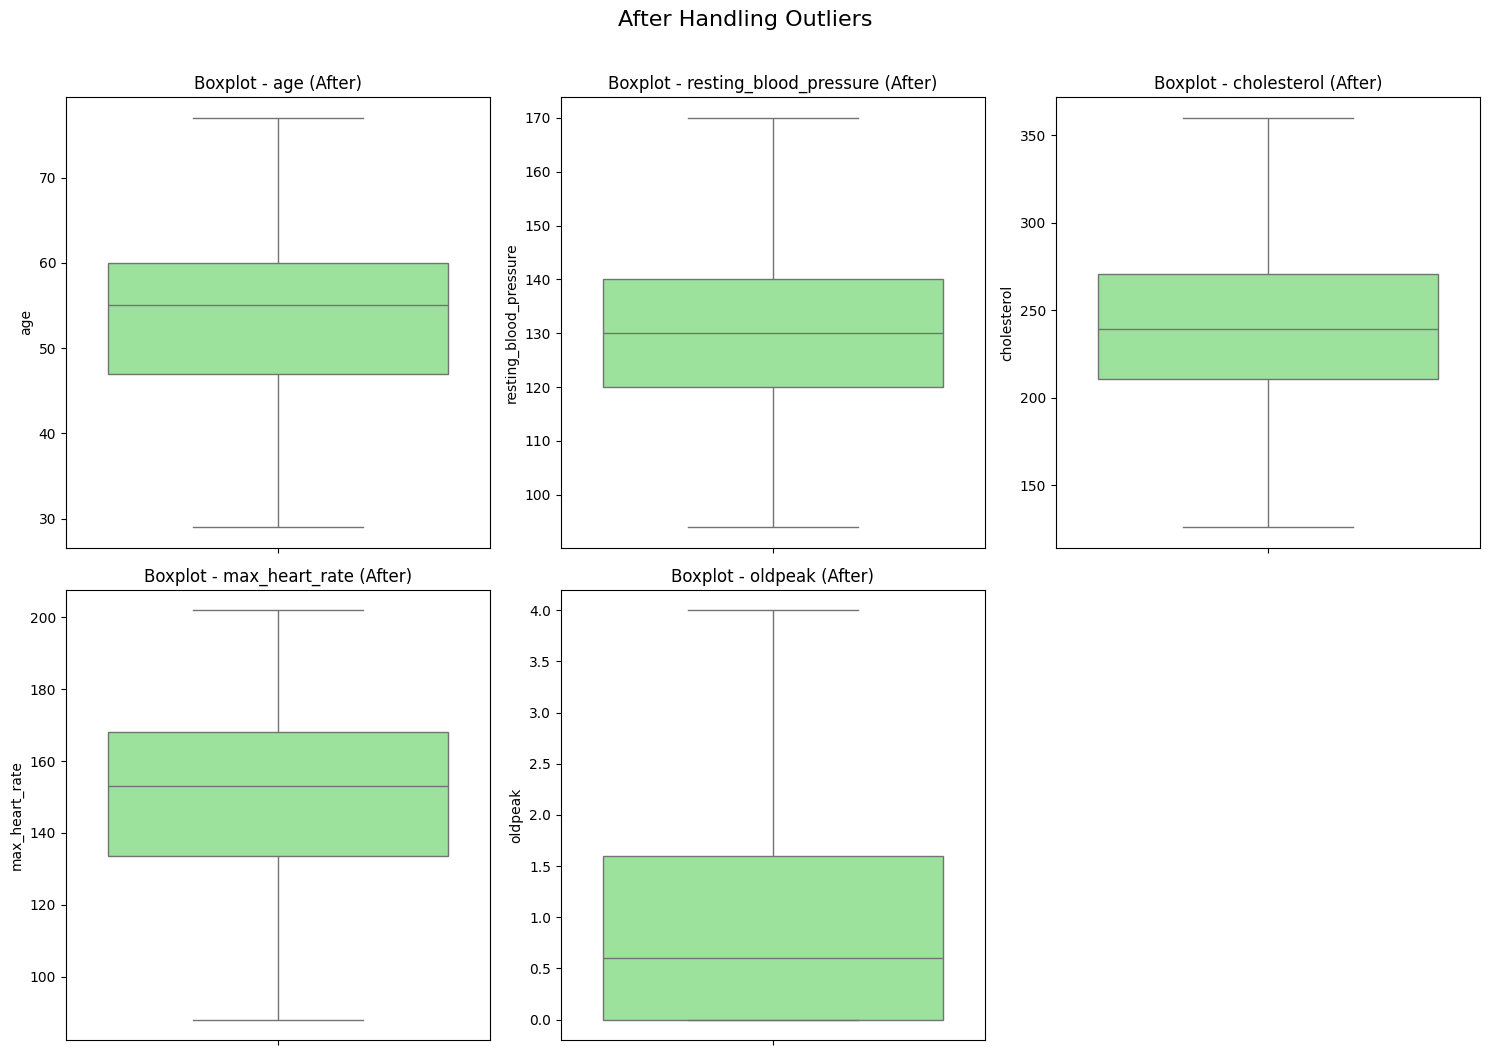

In [47]:
# 3. BOXPLOTS AFTER REMOVING OUTLIERS
# ------------------------------------
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f"Boxplot - {col} (After)")
plt.tight_layout()
plt.suptitle("After Handling Outliers", fontsize=16, y=1.05)
plt.show()

In [48]:
# 4. Save final dataset
df.to_csv("HeartDisease_OutliersHandled.csv", index=False)
print("Final dataset saved as 'HeartDisease_OutliersHandled.csv'")

Final dataset saved as 'HeartDisease_OutliersHandled.csv'


PHASE 2

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load cleaned and outlier-handled dataset
df = pd.read_csv("HeartDisease_OutliersHandled.csv")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
print("Model Evaluation Results:\n", results_df.sort_values(by="F1 Score", ascending=False))


Model Evaluation Results:
                  Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.824561   0.818182  0.870968  0.843750  0.837469
1        Random Forest  0.736842   0.766667  0.741935  0.754098  0.822581
2                  SVM  0.736842   0.785714  0.709677  0.745763  0.805211
3                  KNN  0.701754   0.769231  0.645161  0.701754  0.757444


**Justification:**  
- **Standardization:** Ensures features are on the same scale, improving model performance, especially for SVM, KNN, and Logistic Regression.  
- **PCA (95% variance):** Reduces dimensionality while retaining most information, improving efficiency and reducing overfitting.  
- **Train-Test Split (80-20):** Reserves data for unbiased evaluation.  
- **Model Choices:**  
  - *Logistic Regression:* Simple, interpretable baseline.  
  - *Random Forest:* Robust, handles non-linearities well.  
  - *SVM:* Effective in high-dimensional, complex spaces.  
  - *KNN:* Instance-based, benefits from standardized data.  
- **Metrics:**  
  - *Accuracy:* Overall correctness.  
  - *Precision & Recall:* Useful for imbalanced risks.  
  - *F1 Score:* Balances precision and recall.  
  - *ROC AUC:* Measures class separation ability.

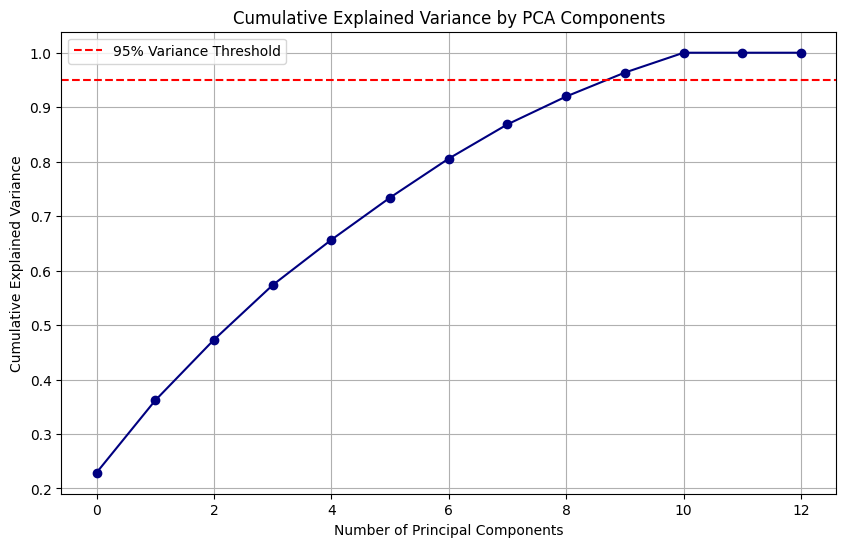

In [50]:
# Plot explained variance by each component
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', color='navy')
plt.axhline(0.95, linestyle='--', color='red', label='95% Variance Threshold')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.show()


# Justification:
The cumulative explained variance plot helps visualize how many principal components are required to retain most of the dataset's variance.
By plotting the cumulative variance, we observe how the information (variance) is distributed across components.
The red dashed line at 95% marks the threshold used in PCA(n_components=0.95), ensuring dimensionality reduction without significant information loss.
This justifies the choice of number of components retained in the PCA transformation step.

Learning Curve - Logistic Regression


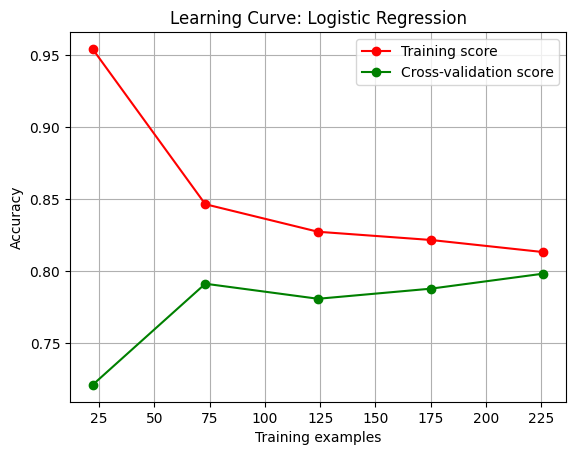

Learning Curve - Random Forest


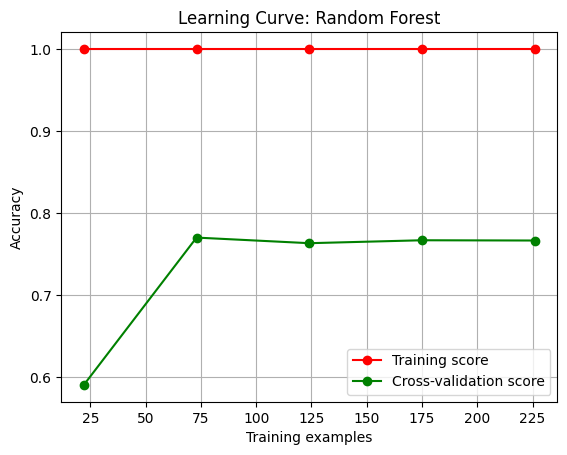

Learning Curve - SVM


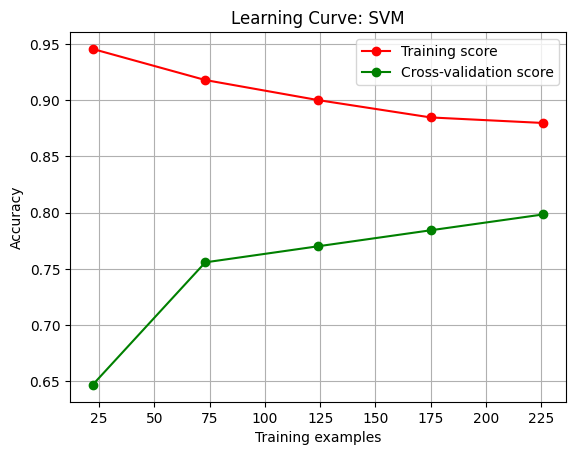

Learning Curve - KNN


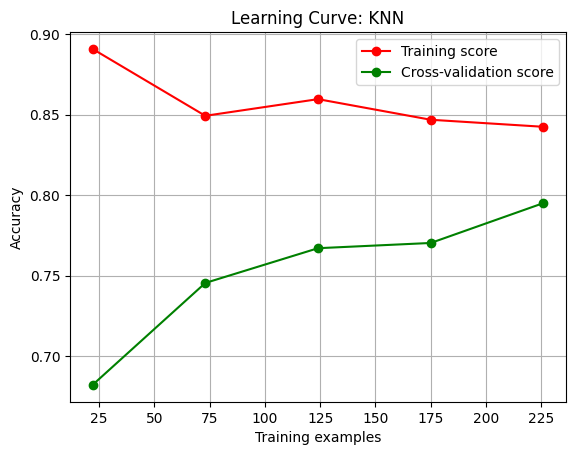

In [51]:
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                            cv=5, scoring='accuracy',
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                            random_state=42)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot for all models
for name, model in models.items():
    print(f"Learning Curve - {name}")
    plot_learning_curve(model, f"Learning Curve: {name}", X_pca, y)


This code plots learning curves for each model to visualize how performance evolves with increasing training data. It helps identify **overfitting**, **underfitting**, or whether **more data would improve accuracy**, providing insight into model generalization and training dynamics.

C:\Users\manta\AppData\Local\Temp\ipykernel_10668\3211915094.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


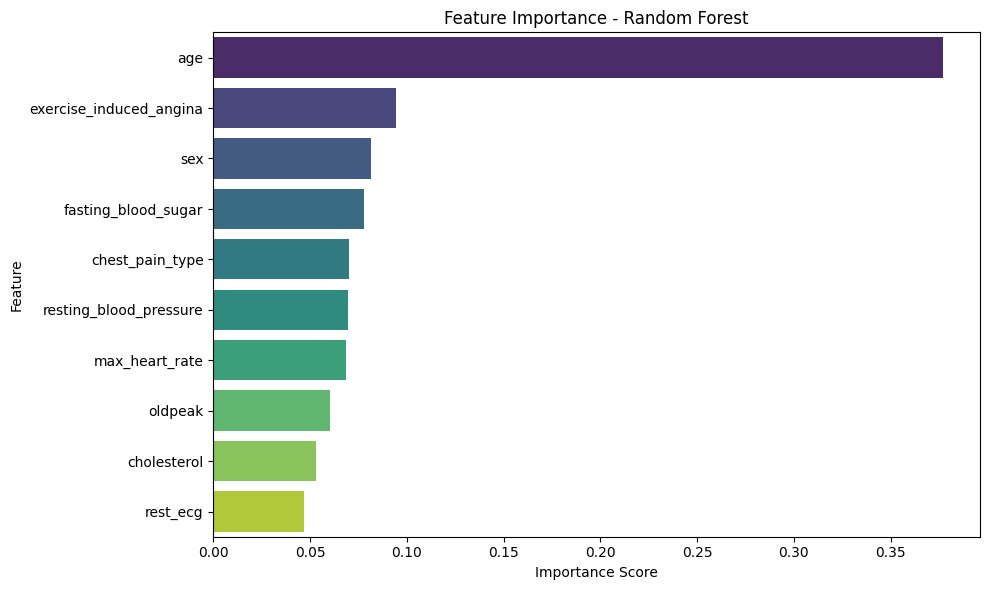

In [52]:
# Train Random Forest on original features to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


This step identifies which features contribute the most to the prediction of heart disease using the Random Forest model. By visualizing **feature importance scores**, we gain insights into the **most influential health indicators**, helping with **model interpretability** and possible **feature selection** for future improvements.

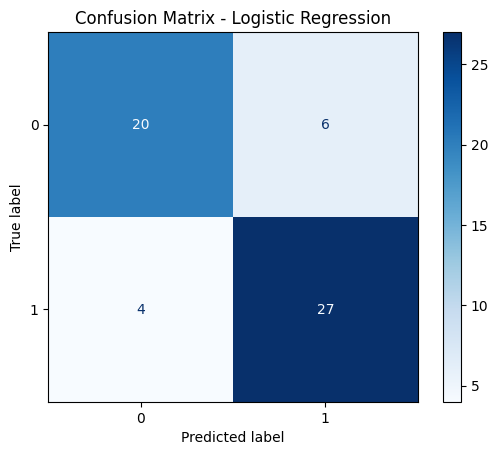

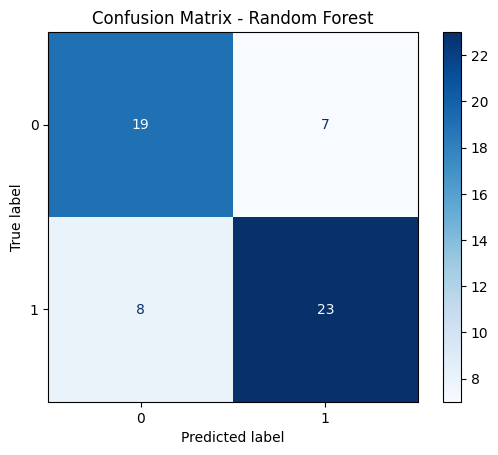

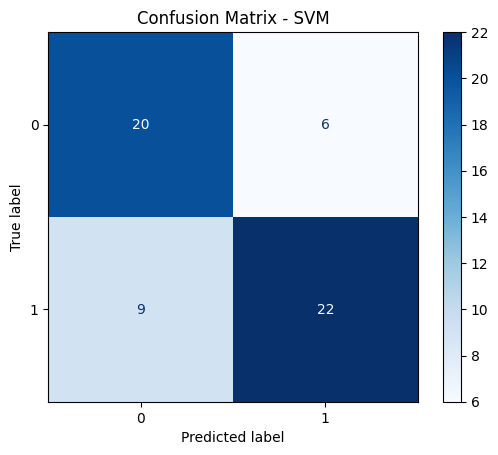

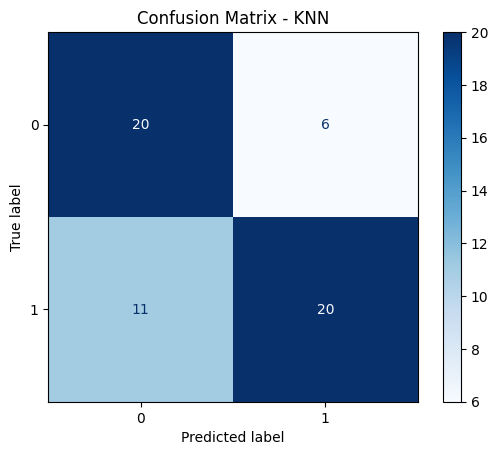

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


This step uses **confusion matrices** to evaluate each model's performance in terms of **true vs. false predictions**. It helps visualize how well each model distinguishes between patients **with and without heart disease**, giving a clear picture of **misclassification patterns**, such as false positives and false negatives.

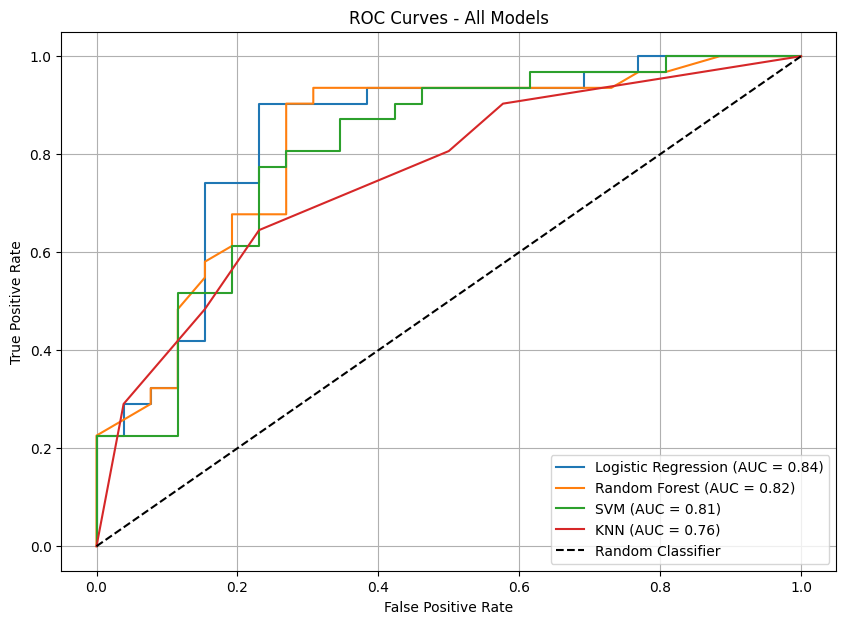

In [54]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


This step plots the **ROC (Receiver Operating Characteristic) curves** for all models to evaluate their ability to distinguish between positive and negative classes at various thresholds. It highlights the trade-off between **True Positive Rate (TPR)** and **False Positive Rate (FPR)**, with the **AUC (Area Under Curve)** providing a single metric to compare model performance — the closer the AUC is to 1, the better the model.

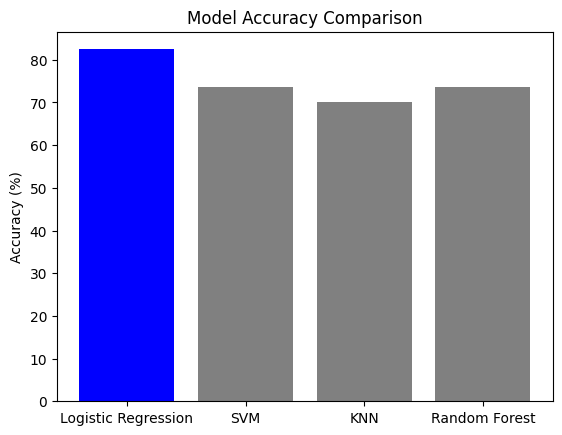

In [55]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest']
accuracy = [82.46, 73.68, 70.18, 73.68]
plt.bar(models, accuracy, color=['blue', 'gray', 'gray', 'gray'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()


C:\Users\manta\AppData\Local\Temp\ipykernel_10668\3299862259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


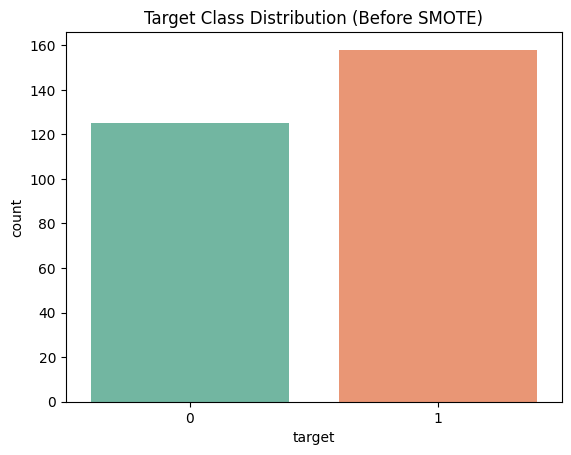

C:\Users\manta\AppData\Local\Temp\ipykernel_10668\3299862259.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set1")


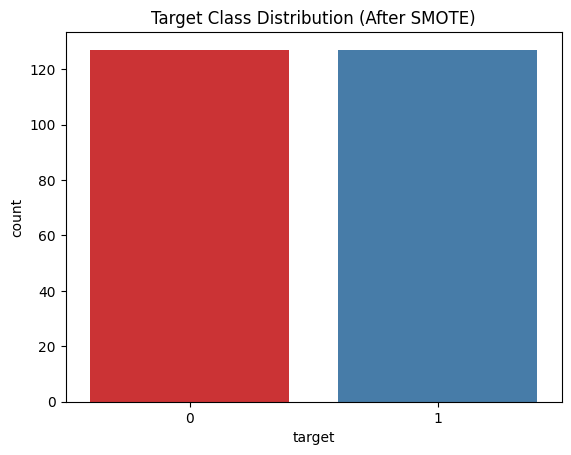

In [58]:
# Before SMOTE
sns.countplot(x=y, palette="Set2")
plt.title("Target Class Distribution (Before SMOTE)")
plt.show()

# After SMOTE
sns.countplot(x=y_train, palette="Set1")
plt.title("Target Class Distribution (After SMOTE)")
plt.show()
